In [133]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import norm
# Import API key
#from api_keys import geoapify_key


In [134]:
# Specify the path to your CSV file
csvpath = 'Resources/reduced.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(csvpath)
data_df = pd.DataFrame(data)
# Display the DataFrame
data_df


,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,357091,Texas,Female,Very good,0.0,30.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,...,1.65,58.97,21.63,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,Yes
1,199859,Minnesota,Female,Good,6.0,25.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.55,56.70,23.62,Yes,Yes,No,Yes,"Yes, received tetanus shot but not sure what type",Yes,No
2,347964,Texas,Female,Good,10.0,20.0,Within past year (anytime less than 12 months ...,Yes,12.0,"6 or more, but not all",...,1.60,61.23,23.91,Yes,No,No,Yes,"Yes, received Tdap",No,No
3,407343,Washington,Female,Fair,0.0,19.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,...,1.57,NaN,NaN,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...
4,211281,Mississippi,Male,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.85,95.25,27.71,Yes,No,Yes,No,"Yes, received tetanus shot, but not Tdap",No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111278,179391,Massachusetts,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.70,74.84,25.84,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Tested positive using home test without a heal...
111279,36107,California,Female,Excellent,0.0,0.0,5 or more years ago,Yes,8.0,None of them,...,1.75,65.77,21.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111280,407783,Washington,Female,Good,0.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,...,1.65,68.04,24.96,No,Yes,No,No,"Yes, received Tdap",No,No
111281,417600,West Virginia,Female,Good,0.0,10.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,...,1.55,52.16,21.73,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No


In [135]:
print(data_df.columns)

Index(['Unnamed: 0', 'State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [136]:
#Remove unneeded columns
cleaned_data_df=data_df[['State', 'Sex','GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',	'PhysicalActivities', 
                         'SleepHours','HadDepressiveDisorder','BMI', 'AlcoholDrinkers', 'ECigaretteUsage','SmokerStatus']]
cleaned_data_df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers,ECigaretteUsage,SmokerStatus
0,Texas,Female,Very good,0.0,30.0,Yes,6.0,No,21.63,No,NaN,Never smoked
1,Minnesota,Female,Good,6.0,25.0,Yes,7.0,Yes,23.62,Yes,Use them every day,Current smoker - now smokes some days
2,Texas,Female,Good,10.0,20.0,Yes,12.0,No,23.91,Yes,Never used e-cigarettes in my entire life,Never smoked
3,Washington,Female,Fair,0.0,19.0,No,8.0,No,NaN,Yes,Never used e-cigarettes in my entire life,Former smoker
4,Mississippi,Male,Very good,4.0,0.0,Yes,7.0,No,27.71,Yes,Never used e-cigarettes in my entire life,Never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
111278,Massachusetts,Male,Excellent,0.0,0.0,Yes,7.0,No,25.84,Yes,Not at all (right now),Never smoked
111279,California,Female,Excellent,0.0,0.0,Yes,8.0,No,21.41,NaN,Not at all (right now),Current smoker - now smokes some days
111280,Washington,Female,Good,0.0,10.0,Yes,6.0,No,24.96,No,Never used e-cigarettes in my entire life,Never smoked
111281,West Virginia,Female,Good,0.0,10.0,Yes,8.0,No,21.73,Yes,Never used e-cigarettes in my entire life,Former smoker


In [137]:
#Check for columns with 'Nan' values
non_nan_counts = cleaned_data_df.count()
print(non_nan_counts)

State                    111283
Sex                      111283
GeneralHealth            111004
PhysicalHealthDays       108526
MentalHealthDays         109110
PhysicalActivities       111021
SleepHours               109954
HadDepressiveDisorder    110565
BMI                       99064
AlcoholDrinkers           99770
ECigaretteUsage          102452
SmokerStatus             102501
dtype: int64


In [138]:
#Remove 'Nan' values from data
cleaned_data2_df=cleaned_data_df.dropna()
cleaned_data2_df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers,ECigaretteUsage,SmokerStatus
1,Minnesota,Female,Good,6.0,25.0,Yes,7.0,Yes,23.62,Yes,Use them every day,Current smoker - now smokes some days
2,Texas,Female,Good,10.0,20.0,Yes,12.0,No,23.91,Yes,Never used e-cigarettes in my entire life,Never smoked
4,Mississippi,Male,Very good,4.0,0.0,Yes,7.0,No,27.71,Yes,Never used e-cigarettes in my entire life,Never smoked
5,California,Female,Very good,0.0,15.0,Yes,7.0,No,24.69,Yes,Not at all (right now),Never smoked
6,Georgia,Female,Good,0.0,6.0,Yes,6.0,No,31.41,No,Never used e-cigarettes in my entire life,Never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
111276,Florida,Female,Good,0.0,30.0,Yes,6.0,No,28.29,No,Never used e-cigarettes in my entire life,Never smoked
111278,Massachusetts,Male,Excellent,0.0,0.0,Yes,7.0,No,25.84,Yes,Not at all (right now),Never smoked
111280,Washington,Female,Good,0.0,10.0,Yes,6.0,No,24.96,No,Never used e-cigarettes in my entire life,Never smoked
111281,West Virginia,Female,Good,0.0,10.0,Yes,8.0,No,21.73,Yes,Never used e-cigarettes in my entire life,Former smoker


In [139]:
#Make sure 'Nan' values are removed
non_nan_counts = cleaned_data2_df.count()
print(non_nan_counts)

State                    87906
Sex                      87906
GeneralHealth            87906
PhysicalHealthDays       87906
MentalHealthDays         87906
PhysicalActivities       87906
SleepHours               87906
HadDepressiveDisorder    87906
BMI                      87906
AlcoholDrinkers          87906
ECigaretteUsage          87906
SmokerStatus             87906
dtype: int64


In [140]:
states=cleaned_data2_df['State'].unique()
print(states)

['Minnesota' 'Texas' 'Mississippi' 'California' 'Georgia' 'Wisconsin'
 'Iowa' 'Colorado' 'Arizona' 'Michigan' 'New Hampshire' 'Indiana'
 'District of Columbia' 'Nebraska' 'Washington' 'Missouri' 'Massachusetts'
 'Puerto Rico' 'Idaho' 'Alabama' 'Tennessee' 'Montana' 'Connecticut'
 'South Dakota' 'Utah' 'Oklahoma' 'Florida' 'South Carolina' 'Virginia'
 'Ohio' 'North Dakota' 'Kansas' 'Maryland' 'Oregon' 'Vermont' 'Maine'
 'Kentucky' 'Nevada' 'Rhode Island' 'New York' 'West Virginia' 'Delaware'
 'North Carolina' 'Alaska' 'Hawaii' 'New Jersey' 'Pennsylvania'
 'Louisiana' 'New Mexico' 'Illinois' 'Arkansas' 'Wyoming' 'Virgin Islands'
 'Guam']


In [141]:
#Remove Guam, Puerto Rico and VI
values_to_remove=['Guam','Puerto Rico','Virgin Islands','District of Columbia']
cleaned_data3_df=cleaned_data2_df[~cleaned_data2_df['State'].isin(values_to_remove)]
cleaned_data3_df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers,ECigaretteUsage,SmokerStatus
1,Minnesota,Female,Good,6.0,25.0,Yes,7.0,Yes,23.62,Yes,Use them every day,Current smoker - now smokes some days
2,Texas,Female,Good,10.0,20.0,Yes,12.0,No,23.91,Yes,Never used e-cigarettes in my entire life,Never smoked
4,Mississippi,Male,Very good,4.0,0.0,Yes,7.0,No,27.71,Yes,Never used e-cigarettes in my entire life,Never smoked
5,California,Female,Very good,0.0,15.0,Yes,7.0,No,24.69,Yes,Not at all (right now),Never smoked
6,Georgia,Female,Good,0.0,6.0,Yes,6.0,No,31.41,No,Never used e-cigarettes in my entire life,Never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
111276,Florida,Female,Good,0.0,30.0,Yes,6.0,No,28.29,No,Never used e-cigarettes in my entire life,Never smoked
111278,Massachusetts,Male,Excellent,0.0,0.0,Yes,7.0,No,25.84,Yes,Not at all (right now),Never smoked
111280,Washington,Female,Good,0.0,10.0,Yes,6.0,No,24.96,No,Never used e-cigarettes in my entire life,Never smoked
111281,West Virginia,Female,Good,0.0,10.0,Yes,8.0,No,21.73,Yes,Never used e-cigarettes in my entire life,Former smoker


In [142]:
#Verify the rows were removed
Number_of_states=cleaned_data3_df['State'].nunique()
print(Number_of_states)

50


In [143]:
#Copy the DataFrame
clean_copy = cleaned_data3_df.copy()

#Map 'Yes' to 1 and "No' to 0
clean_copy.loc[clean_copy['HadDepressiveDisorder'] == 'Yes', 'HadDepressiveDisorder'] = 1
clean_copy.loc[clean_copy['HadDepressiveDisorder'] == 'No', 'HadDepressiveDisorder'] = 0
clean_copy['HadDepressiveDisorder'] = clean_copy['HadDepressiveDisorder'].astype(int)

print(clean_copy['HadDepressiveDisorder'].unique())

[1 0]


In [144]:
#Filter for BMI < 90
filtered_clean_copy = clean_copy[clean_copy['BMI'] < 90]

# Define BMI categories
bins = [0, 18.5, 24.9, 29.9, 39.9, float('inf')]
labels = ['Underweight', 'Healthy weight range', 'Overweight', 'Obese', 'Severe obesity']

# Create a new column for BMI categories
filtered_clean_copy['BMICategory'] = pd.cut(filtered_clean_copy['BMI'], bins=bins, labels=labels, right=True)


#Randomly sample a portion of the data to make it easier to work with (optional); frac value is a percentage 
Random_clean_df = filtered_clean_copy.sample(frac=0.05, random_state=42)
Random_clean_df

C:\Users\chris\AppData\Local\Temp\ipykernel_5960\3901148309.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_clean_copy['BMICategory'] = pd.cut(filtered_clean_copy['BMI'], bins=bins, labels=labels, right=True)


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadDepressiveDisorder,BMI,AlcoholDrinkers,ECigaretteUsage,SmokerStatus,BMICategory
57448,Iowa,Male,Excellent,0.0,0.0,Yes,7.0,0,25.11,Yes,Never used e-cigarettes in my entire life,Never smoked,Overweight
39456,Pennsylvania,Female,Good,20.0,30.0,Yes,7.0,1,26.52,Yes,Never used e-cigarettes in my entire life,Current smoker - now smokes every day,Overweight
46752,Vermont,Male,Fair,10.0,7.0,Yes,8.0,0,33.96,Yes,Never used e-cigarettes in my entire life,Never smoked,Obese
17233,Vermont,Female,Very good,0.0,0.0,Yes,8.0,0,18.60,Yes,Not at all (right now),Former smoker,Healthy weight range
21516,Alabama,Male,Very good,0.0,1.0,Yes,7.0,0,15.80,Yes,Never used e-cigarettes in my entire life,Current smoker - now smokes some days,Underweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107788,Wisconsin,Female,Fair,4.0,5.0,Yes,6.0,0,35.78,No,Never used e-cigarettes in my entire life,Never smoked,Obese
65963,Missouri,Female,Very good,7.0,0.0,Yes,9.0,1,24.41,Yes,Never used e-cigarettes in my entire life,Never smoked,Healthy weight range
65915,Colorado,Male,Excellent,0.0,0.0,Yes,7.0,0,28.76,Yes,Never used e-cigarettes in my entire life,Never smoked,Overweight
96048,Oregon,Male,Good,0.0,0.0,Yes,5.0,0,33.23,No,Never used e-cigarettes in my entire life,Never smoked,Obese


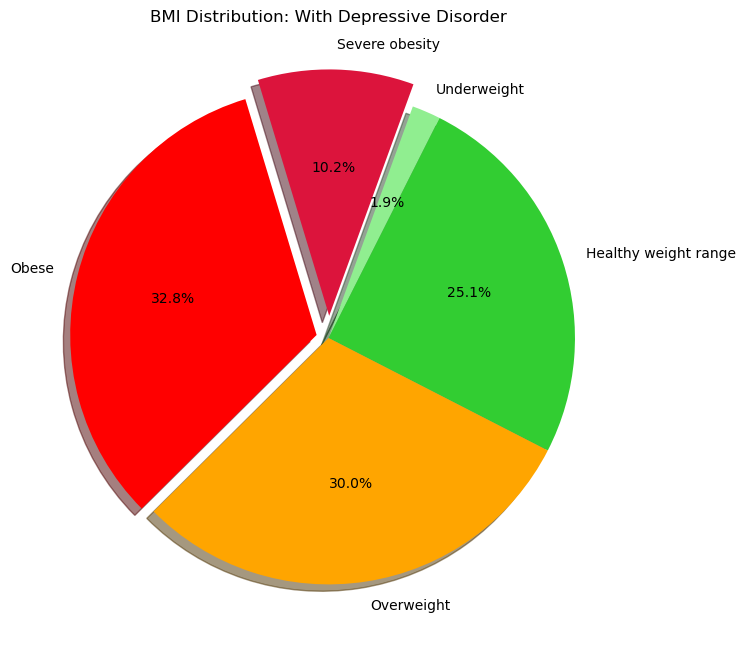

In [152]:
# Filter data for individuals with and without depressive disorders
depressive_counts = filtered_clean_copy[filtered_clean_copy['HadDepressiveDisorder'] == 1]['BMICategory'].value_counts()
non_depressive_counts = filtered_clean_copy[filtered_clean_copy['HadDepressiveDisorder'] == 0]['BMICategory'].value_counts()

# Define the desired order
order = ['Underweight', 'Healthy weight range', 'Overweight', 'Obese', 'Severe obesity']

# Reorder the counts
depressive_counts = depressive_counts.reindex(order, fill_value=0)
non_depressive_counts = non_depressive_counts.reindex(order, fill_value=0)

# Define the explode values (explode "Overweight", "Obese", "Severe Obesity")
explode = [0, 0, 0.0, 0.05, 0.09] 

# Create the first pie chart for depressive disorder
plt.figure(figsize=(8,8))
plt.pie(depressive_counts, labels=order, explode=explode, autopct='%1.1f%%', startangle=70, counterclock=False, colors=['lightgreen', 'limegreen', 'orange', 'red', 'crimson'], shadow=True)
plt.title('BMI Distribution: With Depressive Disorder')
plt.savefig("output_data/BMI_Distribution")
plt.show()



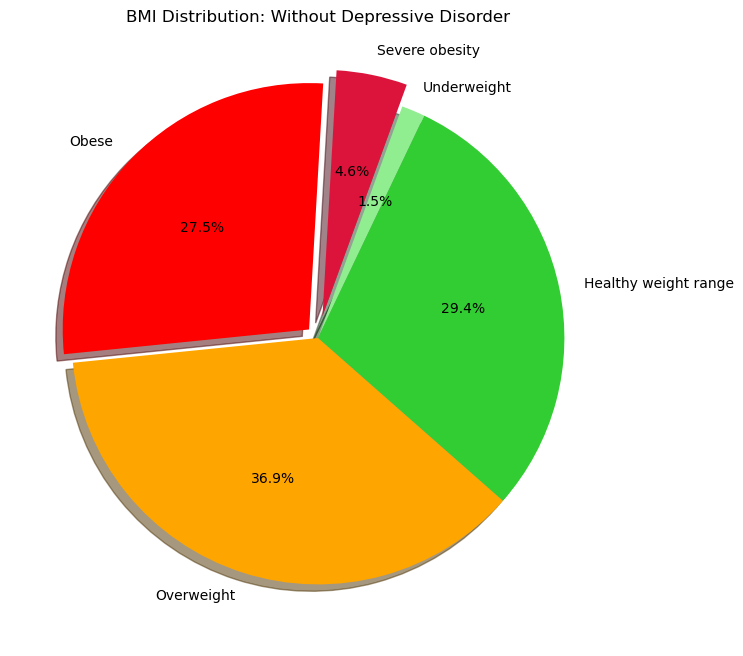

In [153]:
# Create the second pie chart for no depressive disorder
plt.figure(figsize=(8, 8))
plt.pie(non_depressive_counts, labels=order, explode=explode, autopct='%1.1f%%', startangle=70, counterclock=False, colors=['lightgreen', 'limegreen', 'orange', 'red', 'crimson'], shadow=True)
plt.title('BMI Distribution: Without Depressive Disorder')
plt.savefig("output_data/BMI_Distribution2")
plt.show()

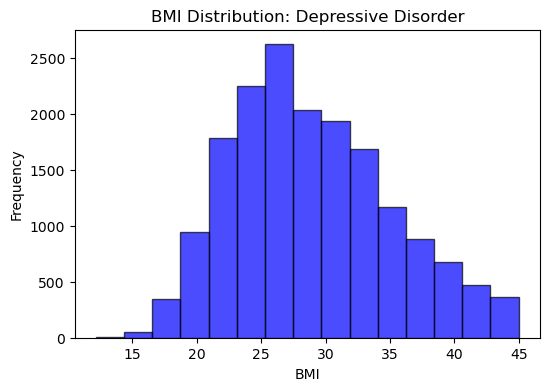

In [155]:
#Filter for BMI < 45
filtered_clean_copy_2 = clean_copy[clean_copy['BMI'] < 45]

# Separate the groups
depressive_bmi = filtered_clean_copy_2[filtered_clean_copy_2['HadDepressiveDisorder'] == 1]['BMI']
non_depressive_bmi = filtered_clean_copy_2[filtered_clean_copy_2['HadDepressiveDisorder'] == 0]['BMI']

# Plot histogram for depressive disorder group
plt.figure(figsize=(6, 4))
plt.hist(depressive_bmi, bins=15, alpha=0.7, color='blue',edgecolor='black')
plt.title('BMI Distribution: Depressive Disorder')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.savefig("output_data/BMI_Distribution3")
plt.show()



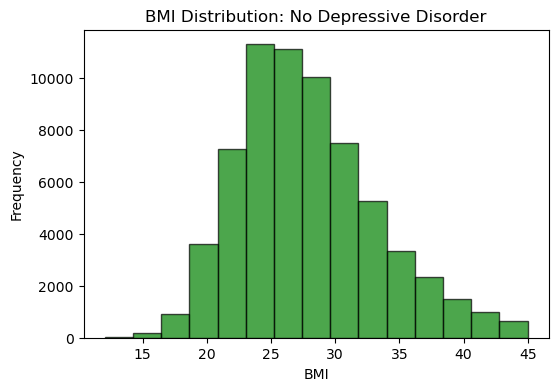

In [154]:
# Plot histogram for non-depressive disorder group
plt.figure(figsize=(6, 4))  
plt.hist(non_depressive_bmi, bins=15, alpha=0.7, color='green',edgecolor='black')
plt.title('BMI Distribution: No Depressive Disorder')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.savefig("output_data/BMI_Distribution4")
plt.show()

In [130]:
import scipy.stats as stats

# Create a relationship table for BMI categories and depressive disorder
relationship_table = pd.crosstab(filtered_clean_copy['BMICategory'], filtered_clean_copy['HadDepressiveDisorder'])

# Perform Chi-Square Test
chi2, p_value, dof, expected = stats.chi2_contingency(relationship_table)

# Print results
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)


Chi-Square Statistic: 1190.7524143996102
P-value: 1.6103447632462676e-256
